In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
bitcoin_df = pd.read_csv(r"C:\Users\Dreamy gupta\Downloads\Bitcoin/bitcoin_price_Training - Training.csv")

In [8]:
bitcoin_df.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [10]:
bitcoin_df.shape

(1556, 7)

In [16]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [17]:
bitcoin_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [20]:
bitcoin_df['Date'] = bitcoin_df['Date'].astype('datetime64[ns]')

In [21]:
bitcoin_df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [22]:
bitcoin_df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [23]:
bitcoin_df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [24]:
bitcoin_df.duplicated().sum()

0

In [27]:
bitcoin_df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [28]:
bitcoin_df.tail(3)

,Date,Open,High,Low,Close,Volume,Market Cap
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [41]:
bitcoin_df = bitcoin_df.sort_index(ascending=False).reset_index()

In [42]:
bitcoin_df.head(3)

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [43]:
bitcoin_df.drop('index', axis=1, inplace=True)

In [44]:
bitcoin_df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


## Analysing change in price of Bitcoin overtime

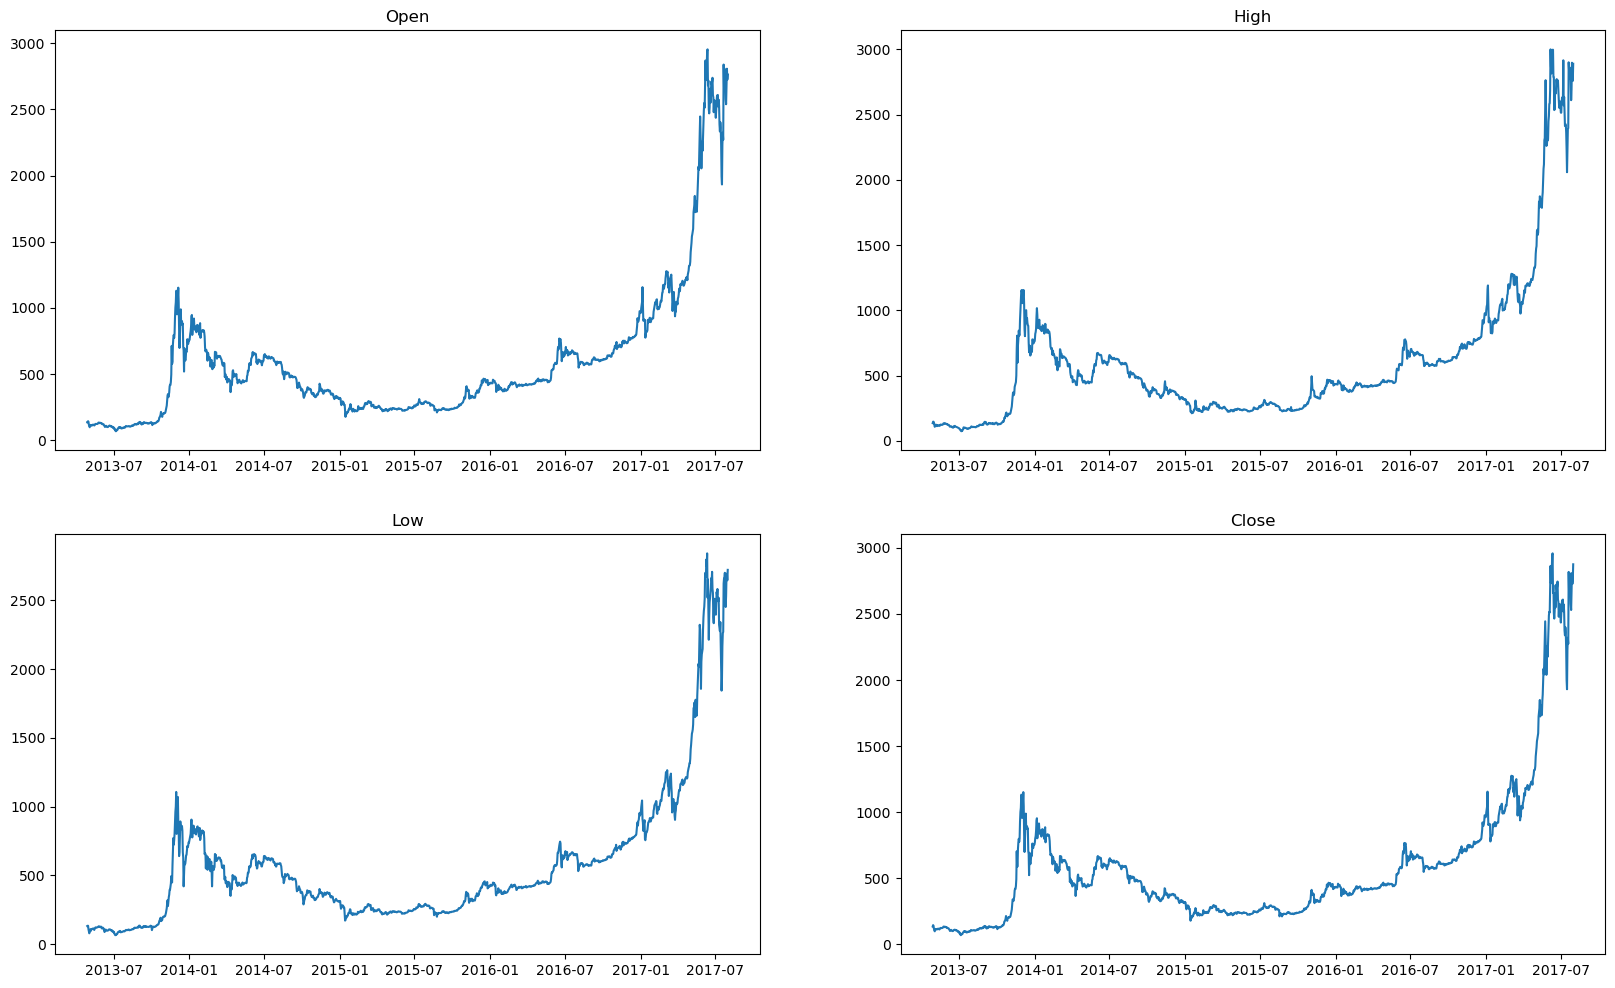

In [49]:
plt.figure(figsize=(20,12))

for index, col in enumerate(['Open','High','Low','Close'], 1):
    plt.subplot(2,2,index)
    plt.plot(bitcoin_df['Date'], bitcoin_df[col])
    plt.title(col)

In [50]:
bitcoin_sample = bitcoin_df[0:50]

In [98]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [53]:
init_notebook_mode(connected = True)

In [55]:
trace = go.Candlestick( x = bitcoin_sample['Date'], high = bitcoin_sample['High'], close = bitcoin_sample['Close'], 
               open = bitcoin_sample['Open'], low = bitcoin_sample['Low'])

In [58]:
fig = go.Figure(data = trace, layout={'title': 'Bitcoin Price Chart',
                                     'xaxis':{'title':'Date'}
                                     })

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

## Closing price in depth

In [59]:
bitcoin_df['Close']

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

In [62]:
bitcoin_df.set_index('Date', inplace = True)

<Axes: xlabel='Date'>

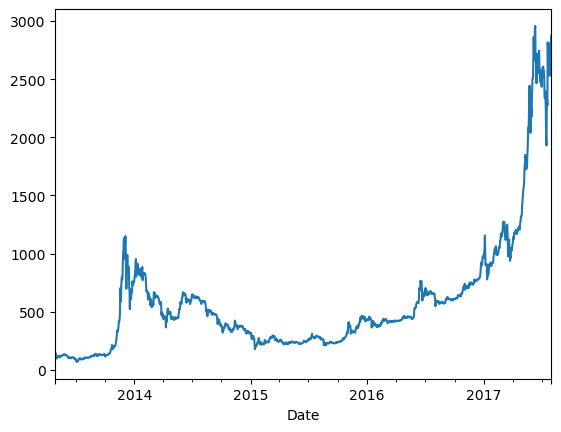

In [66]:
bitcoin_df['Close'].plot()

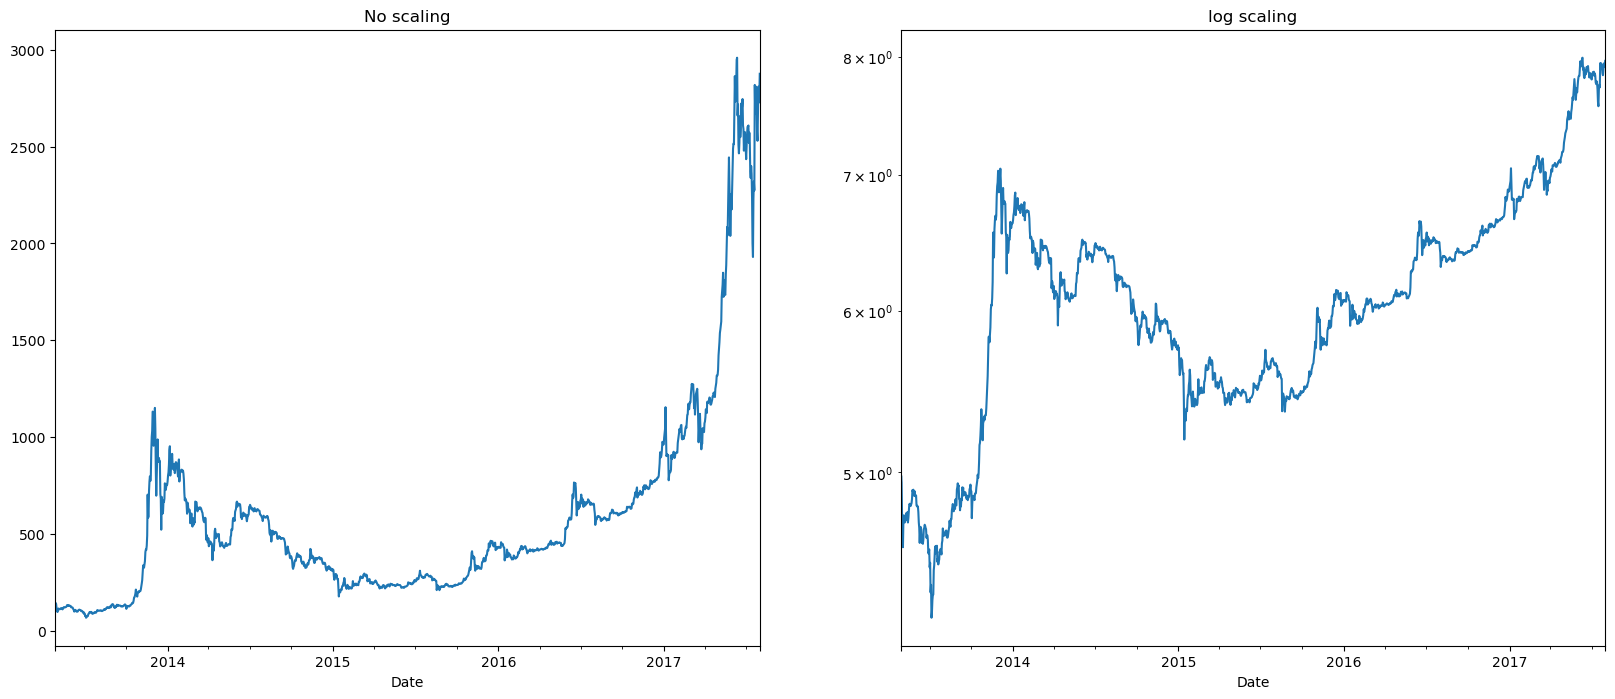

In [69]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
bitcoin_df['Close'].plot()
plt.title('No scaling')


plt.subplot(1,2,2)
np.log1p(bitcoin_df['Close']).plot()
plt.title('log scaling')
plt.yscale('log')

## Analysing Closing Price on  Monthly, Quaterly and Yearly Basis

In [71]:
bitcoin_df['Close'].resample('M').mean()

Date
2013-04-30     139.250000
2013-05-31     119.993226
2013-06-30     107.761333
2013-07-31      90.512258
2013-08-31     113.905161
2013-09-30     130.061667
2013-10-31     158.311935
2013-11-30     550.420667
2013-12-31     800.780968
2014-01-31     844.168387
2014-02-28     661.618214
2014-03-31     592.200323
2014-04-30     461.362000
2014-05-31     486.651290
2014-06-30     615.917333
2014-07-31     618.025484
2014-08-31     536.087742
2014-09-30     445.186333
2014-10-31     364.150000
2014-11-30     366.100000
2014-12-31     341.268387
2015-01-31     248.782581
2015-02-28     234.153571
2015-03-31     269.041290
2015-04-30     235.491667
2015-05-31     236.996774
2015-06-30     238.081000
2015-07-31     279.563871
2015-08-31     250.734516
2015-09-30     233.595333
2015-10-31     264.855161
2015-11-30     348.883333
2015-12-31     424.464516
2016-01-31     410.844516
2016-02-29     404.408276
2016-03-31     416.525161
2016-04-30     434.339333
2016-05-31     461.953871
2016-06

Text(0.5, 1.0, 'Month-wise Closing Prices')

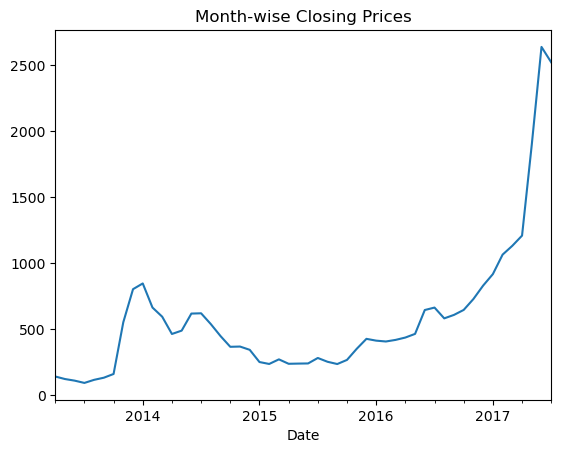

In [77]:
bitcoin_df['Close'].resample('M').mean().plot()
plt.title('Month-Wise Closing Prices')

In [78]:
bitcoin_df['Close'].resample('Q').mean()

Date
2013-06-30     115.162188
2013-09-30     111.291196
2013-12-31     502.657609
2014-03-31     700.586000
2014-06-30     520.929341
2014-09-30     534.055435
2014-12-31     357.075761
2015-03-31     251.209333
2015-06-30     236.858022
2015-09-30     254.859891
2015-12-31     346.037065
2016-03-31     410.728571
2016-06-30     512.492747
2016-09-30     615.702283
2016-12-31     732.721413
2017-03-31    1034.707444
2017-06-30    1912.552198
2017-09-30    2519.418387
Freq: Q-DEC, Name: Close, dtype: float64

Text(0.5, 1.0, 'Quaterly Closing Prices')

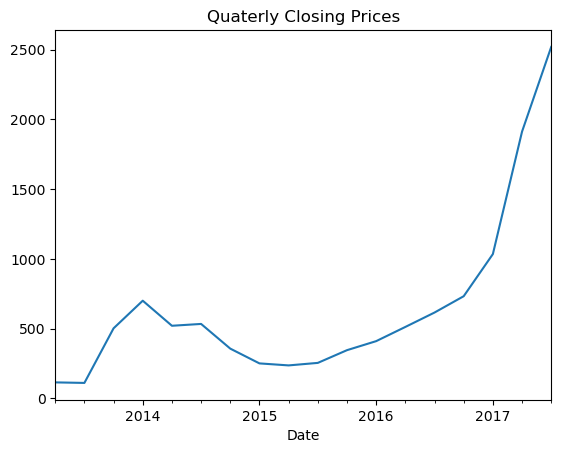

In [80]:
bitcoin_df['Close'].resample('Q').mean().plot()
plt.title('Quaterly Closing Prices')

In [81]:
bitcoin_df['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

Text(0.5, 1.0, 'Yearly Closing Prices')

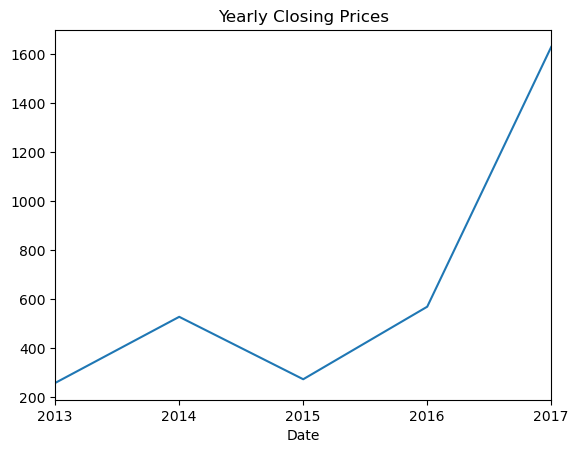

In [83]:
bitcoin_df['Close'].resample('Y').mean().plot()
plt.title('Yearly Closing Prices')

## Analysing Daily change in Closing Price of stocks

In [85]:
bitcoin_df['Close']

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [89]:
bitcoin_df['Close_price_pct_change'] = bitcoin_df['Close'].pct_change()*100

In [90]:
bitcoin_df['Close_price_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

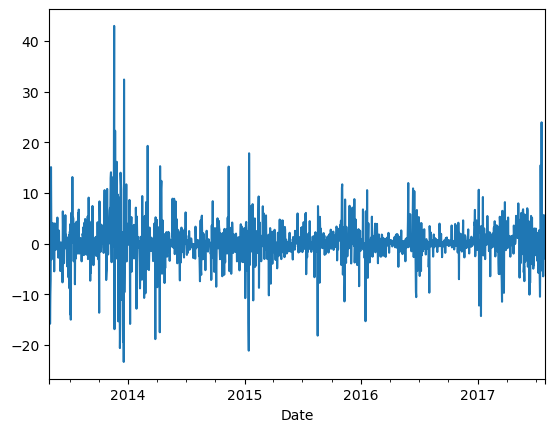

In [91]:
bitcoin_df['Close_price_pct_change'].plot()